In [3]:
!pip install transformers datasets

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 1.2 MB/s eta 0:00:00 kB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.2/141.2 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 8.3 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.3/362.3 kB 8.6 MB/s eta 0:00:008.6 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.3/362.3 kB 9.2 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 361.9/361.9 kB 9.0 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.8/346.8 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 342.2/342.2 kB 8.8 MB/s eta 0:00:008.5 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 342.3/342.3 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.4/325.4 kB 9.7 MB/s eta 0:00:00
    

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.4/131.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 11.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 0.8.3
    Uninstalling fsspec-0.8.3:
      Successfully uninstalled fsspec-0.8.3
  Attempting uninstall: dill
    Found existing installation: dill 0.3.3
    Uninstalling dill-0.3.3:
      Successfully uninstalled dill-0.3.3


### Import datasets - Hugginface library

In [4]:
from datasets import list_datasets

In [5]:
all_datasets = list_datasets()

In [8]:
print(f"There are {len(all_datasets)} datasets currently available on the Hub")
print(f"The first 10 are: {all_datasets[:10]}")

There are 8543 datasets currently available on the Hub
The first 10 are: ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


### Let's load emotion dataset

In [9]:
from datasets import load_dataset

In [10]:
emotions = load_dataset('emotion')

Using custom data configuration default


Dataset emotion downloaded and prepared to /home/dawidkubicki/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705. Subsequent calls will reuse this data.


In [13]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [14]:
train_ds = emotions["train"]

In [15]:
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [16]:
len(train_ds)

16000

In [19]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [20]:
train_ds.column_names

['text', 'label']

In [21]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], names_file=None, id=None)}

### From datasets to DataFrames

In [22]:
import pandas as pd

In [23]:
emotions.set_format(type="pandas")

In [24]:
df = emotions["train"][:]

In [41]:
def label2str(row):
    return emotions["train"].features['label'].int2str(row)

In [47]:
df["label name"] = df["label"].apply(label2str)

In [48]:
df.head()

,text,label,label name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


### Looking at the Class Distribution

In [50]:
import matplotlib.pyplot as plt

TypeError: barh() missing 2 required positional arguments: 'y' and 'width'

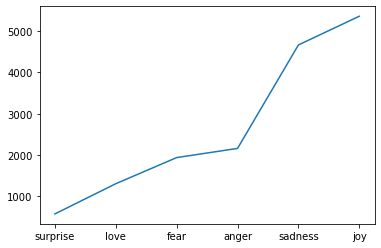

In [60]:
df['label name'].value_counts(ascending=True).plot().barh()
plt.title("Frequency of classes")

### How long are the Tweets?

In [68]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)

In [69]:
df["Words Per Tweet"]

0         4
1        21
2        10
3        18
4         4
         ..
15995    24
15996    20
15997     6
15998    14
15999    15
Name: Words Per Tweet, Length: 16000, dtype: int64

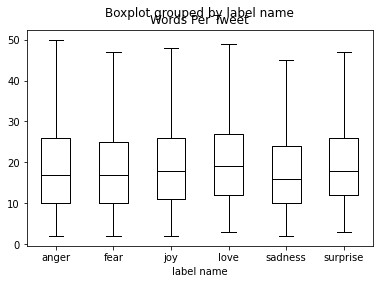

In [71]:
df.boxplot("Words Per Tweet", by="label name", grid=False, showfliers=False, color="black")
plt.show()